In [1]:
from constrain.lab.transformation import *

In [2]:
# done 

def test_ng_to_nmol():
    
    ''' Testing that it calculates correctly'''
    
    #increasing ng
    assert ng_to_nmol(100, 1000) == 0.00015384615384615385
    assert ng_to_nmol(1000, 1000) == 0.0015384615384615385
    
    #increaseing basepair
    assert ng_to_nmol(100, 5000) == 3.076923076923077e-05
    assert ng_to_nmol(100, 10000) == 1.5384615384615384e-05
    
    # Non-valid input
    assert ng_to_nmol(-500, 8000) == 'non-valid_input'
    assert ng_to_nmol(500, -9000) == 'non-valid_input'
    
    # division by zero
    assert ng_to_nmol(0, 8000) == 'non-valid_input'
    assert ng_to_nmol(500, 0) == 'non-valid_input'



def test_ODtime(): 
    
    assert ODtime(1, 1) == 1.414

    assert ODtime(0, 1) == 0.0

    assert ODtime(1, 0) == 1.0
    assert ODtime(1, 10) == 32.0
    
    #non-valid input
    assert ODtime(-1, 1) == 'non-valid_input'
    assert ODtime(1, -1) == 'non-valid_input'
    

In [3]:
    
def test_time_to_inoculate():
    pass
    
    
def test_transformation_mix(): 

    pass

GOAL: to get enough cells in exponential phase for transformation
Assumed that: 
- transformation time 18 (reached OD=1 the day after)


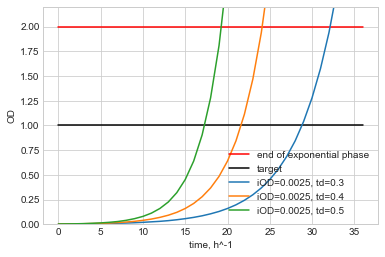

Hours to OD = 1: 	22 hours
Transformation time has been set to  18
Time of inoculation: 	20 (the day before)

If you innoculate now, the cells will have reached OD= 1 by:   2022-09-20 09:47:42.393569

How to hit initialOD = 0.0025 (e.g. from colony)? Guess. Inoculate 9/10 + 1/10 'normal' colony per ~10 ml
How much volume? ~2 ml per transformation


In [6]:
inoculate = time_to_inculate( transformation_time = 18, verbose=True)

In [11]:
    
def test_time_to_inoculate():
    inoculate = time_to_inculate( transformation_time = 18, verbose=True)
    
    assert print(inoculate) == None
    

GOAL: to get enough cells in exponential phase for transformation
Assumed that: 
- transformation time 18 (reached OD=1 the day after)


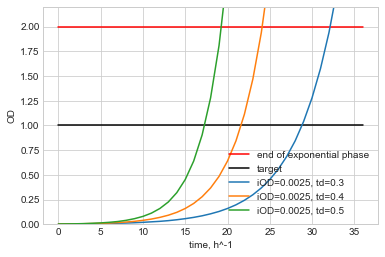

Hours to OD = 1: 	22 hours
Transformation time has been set to  18
Time of inoculation: 	20 (the day before)

If you innoculate now, the cells will have reached OD= 1 by:   2022-09-20 11:18:11.233822

How to hit initialOD = 0.0025 (e.g. from colony)? Guess. Inoculate 9/10 + 1/10 'normal' colony per ~10 ml
How much volume? ~2 ml per transformation


NoneType

In [83]:
inoculate = time_to_inculate( transformation_time = 18, verbose=True)
type(inoculate)

In [13]:
def test_transformation_mix(): 

    pass

In [48]:
from Bio import SeqIO
import numpy as np
vector = SeqIO.read('../tests/files_for_testing/MIA-HA-1.gb', format = 'gb')
gRNA1_pcr_prod = SeqIO.read('../tests/files_for_testing/gRNA_test1.fasta', format = 'fasta')
gRNA2_pcr_prod = SeqIO.read('../tests/files_for_testing/gRNA_test2.fasta', format = 'fasta')
LEU_plasmid = SeqIO.read('../tests/files_for_testing/MIA-HA-1.gb', format = 'gb')[1000:5000]


#names 
vector.name = 'p0056\\(pESC-LEU-ccdB-USER)'
gRNA1_pcr_prod.name = 'ATF1' 
gRNA2_pcr_prod.name  = 'CroCPR' 
LEU_plasmid.name = 'LEU_plasmid'

#annott
vector.annotations['batches'] = [{'location':'Freezer1', 'concentration':123}]
gRNA1_pcr_prod.annotations['batches']  = [{'location':'Freezer2','concentration':274}]
gRNA2_pcr_prod.annotations['batches']   = [{'location':'Freezer3','concentration':124}]
LEU_plasmid.annotations['batches']  = [{'location':'Freezer4','concentration':187}]




In [49]:
# 1. Mention which reacion names you have
reaction_names = ["insert", "n.ctr", "n.ctr", "n.ctr", "p. ctr"]

# 2. Add reaction reaction_participants
reaction_participants = [[vector, gRNA1_pcr_prod,gRNA2_pcr_prod], #the insert we want
                 [vector],                                        #negative control
                 [gRNA1_pcr_prod],                                #negative control
                 [gRNA2_pcr_prod],                                #negative control
                 [LEU_plasmid]]                                   #positive control

# 2. Calculate nmol:
nmol_vector = ng_to_nmol(ng = 15, bp = len(vector))
nmol_gRNA = ng_to_nmol(ng = 30, bp = len(gRNA1_pcr_prod))
nmol_pctr = ng_to_nmol(ng = 10, bp = len(LEU_plasmid))

# 3. Add the concentrations
wanted_concentrations = {'p0056\\(pESC-LEU-ccdB-USER)' : nmol_vector,
                 'ATF1'                        : nmol_gRNA,
                 'CroCPR'                      : nmol_gRNA,
                 'LEU_plasmid'                 : nmol_pctr}

# 4. what media the transformants are plated on (5 transformations here)
media = ['LB_AMP'] * 5

# 5. initate the function
trans_df = transformation_mix(reaction_names, reaction_participants, wanted_amounts = wanted_concentrations, water_dna_p_reac = 7, media = media)
trans_df

,name,p0056\(pESC-LEU-ccdB-USER),ATF1,CroCPR,LEU_plasmid,water,plate on
0,insert,0.1,0.1,0.1,NaN,6.7,LB_AMP
1,n.ctr,0.1,NaN,NaN,NaN,6.9,LB_AMP
2,n.ctr,NaN,0.1,NaN,NaN,6.9,LB_AMP
3,n.ctr,NaN,NaN,0.1,NaN,6.9,LB_AMP
4,p. ctr,NaN,NaN,NaN,0.1,6.9,LB_AMP


In [61]:
# insert 
assert trans_df.iloc[0]['name'] == 'insert'
assert trans_df.iloc[0]['p0056\(pESC-LEU-ccdB-USER)'] == 0.1
assert trans_df.iloc[0]['ATF1'] == 0.1
assert trans_df.iloc[0]['CroCPR'] == 0.1
assert trans_df.iloc[0]['water'] == 6.7
assert trans_df.iloc[0]['plate on'] == 'LB_AMP'


# n.ctr 
assert trans_df.iloc[1]['name'] == 'n.ctr'
assert trans_df.iloc[1]['p0056\(pESC-LEU-ccdB-USER)'] == 0.1
assert trans_df.iloc[1]['water'] == 6.9
assert trans_df.iloc[1]['plate on'] == 'LB_AMP'


# p.ctr 
assert trans_df.iloc[4]['name'] == 'p. ctr'
assert trans_df.iloc[4]['LEU_plasmid'] == 0.1
assert trans_df.iloc[4]['water'] == 6.9
assert trans_df.iloc[4]['plate on'] == 'LB_AMP'

In [69]:
def test_wanted_mass(): 
    
    assert wanted_mass(10, 20) == 130000
    assert wanted_mass(10, 150) == 975000
    assert wanted_mass(10, 250) == 1625000

    

print(wanted_mass(10, 250))

1625000


In [76]:

def test_wanted_volume():
    assert wanted_volume(100, 54) == 1.9
    assert wanted_volume(100, 153) == 0.7
    assert wanted_volume(143, 89) == 1.6
     



1.6

In [79]:
for i in range(10,200,10):
    
    print(wanted_mass(i,50))
    print(i)

325000
10
650000
20
975000
30
1300000
40
1625000
50
1950000
60
2275000
70
2600000
80
2925000
90
3250000
100
3575000
110
3900000
120
4225000
130
4550000
140
4875000
150
5200000
160
5525000
170
5850000
180
6175000
190


In [ ]:
thermal_cyclers = det_no_of_thermal_cyclers(promoter_amplicons, polymerase=pol) # pol
thermal_cyclers